In [35]:
#Predicción del consumo de energía de electrodomésticos en hogares inteligentes.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib
import numpy as np

In [20]:
df = pd.read_csv("smart_home_energy_consumption_large.csv")
df.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Home ID                   100000 non-null  int64  
 1   Appliance Type            100000 non-null  object 
 2   Energy Consumption (kWh)  100000 non-null  float64
 3   Time                      100000 non-null  object 
 4   Date                      100000 non-null  object 
 5   Outdoor Temperature (°C)  100000 non-null  float64
 6   Season                    100000 non-null  object 
 7   Household Size            100000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [22]:
df.describe()

,Home ID,Energy Consumption (kWh),Outdoor Temperature (°C),Household Size
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,250.374980,1.499952,14.950135,3.001770
std,144.435367,1.181176,14.438755,1.417077
min,1.000000,0.100000,-10.000000,1.000000
25%,125.000000,0.590000,2.400000,2.000000
50%,250.000000,1.230000,14.900000,3.000000
75%,375.000000,1.870000,27.400000,4.000000
max,500.000000,5.000000,40.000000,5.000000


In [23]:
#ordenar el dataframe elegido

# convertir la columna 'Date' al formato de fecha
df['Date'] = pd.to_datetime(df['Date'])

#ordenar por id y por fecha
df = df.sort_values(by=['Home ID', 'Date'])
df = df.reset_index(drop=True)

df.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,1,Lights,0.91,11:04,2023-01-05,13.4,Winter,2
1,1,Heater,4.59,09:03,2023-01-07,32.7,Winter,4
2,1,Air Conditioning,2.77,06:30,2023-01-07,-3.3,Winter,3
3,1,Washing Machine,1.70,11:58,2023-01-08,17.5,Winter,3
4,1,TV,0.70,09:21,2023-01-10,29.5,Winter,1


In [24]:
#guardar csv modificado
df.to_csv("consumo_energia.csv", index=False)

In [25]:
#leer csv nuevo
df = pd.read_csv("consumo_energia.csv")

df.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,1,Lights,0.91,11:04,2023-01-05,13.4,Winter,2
1,1,Heater,4.59,09:03,2023-01-07,32.7,Winter,4
2,1,Air Conditioning,2.77,06:30,2023-01-07,-3.3,Winter,3
3,1,Washing Machine,1.70,11:58,2023-01-08,17.5,Winter,3
4,1,TV,0.70,09:21,2023-01-10,29.5,Winter,1


In [27]:
df["Energy Consumption (kWh)"].mean()

np.float64(1.4999516)

In [29]:
#punto tres(Cree y entrene un modelo de regresión lineal con la librería Scikit Learn)
x = df[['Outdoor Temperature (°C)']]
y = df['Energy Consumption (kWh)']

#entrenamiento
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=42)

#creacion del modelo
modelo = LinearRegression()

#entrenamiento del modelo
modelo.fit(x_entrenamiento, y_entrenamiento)

LinearRegression()

In [30]:
#guardar modelo
joblib.dump(modelo, "regresion_model_student_score.pkl")

#cargar modelo
reg = joblib.load("regresion_model_student_score.pkl")

In [33]:
#punto cuatro (realizar predicciones)
#6°C
consumo = reg.predict([[6]])[0]
print("consumo energético para 6°C:", consumo)

predicciones = modelo.predict(x_prueba)

consumo energético para 6°C: 1.5028243081910546


c:\Users\IPF-2025\Desktop\python\regresion_lineal_tlp3_abril_alonso\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
x_prueba_ordenado = x_prueba.sort_values(by="Outdoor Temperature (°C)")
predicciones_ordenadas = modelo.predict(x_prueba_ordenado)

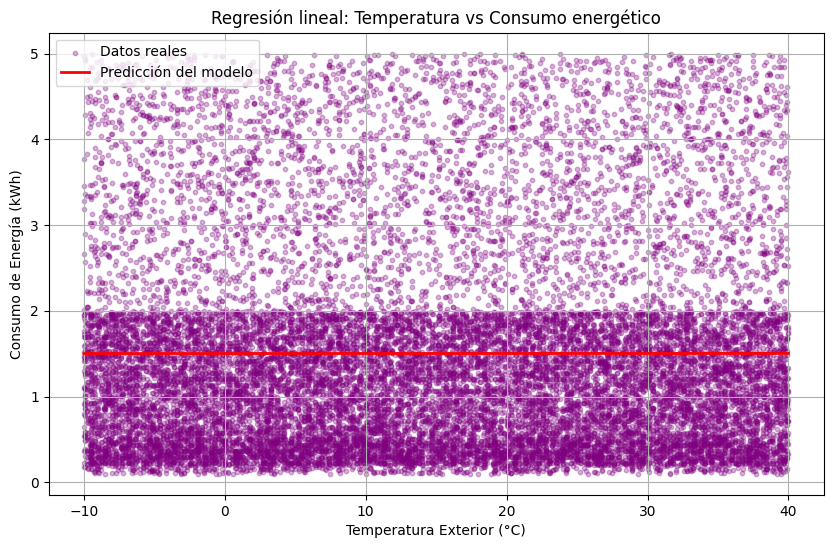

In [38]:
#punto cinco (graficar)
plt.figure(figsize=(10, 6))
plt.scatter(x_prueba, y_prueba, color='purple', alpha=0.3, s=10, label='Datos reales')
plt.plot(x_prueba_ordenado, predicciones_ordenadas, color='red', linewidth=2, label='Predicción del modelo')
plt.xlabel("Temperatura Exterior (°C)")
plt.ylabel("Consumo de Energía (kWh)")
plt.title("Regresión lineal: Temperatura vs Consumo energético")
plt.legend()
plt.grid(True)
plt.show()